In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
tf.executing_eagerly()

True

In [3]:
x = [[2.]]
m = tf.matmul(x, x)
print("hello, {}".format(m))

hello, [[4.]]


In [4]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [5]:
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [6]:
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [7]:
import numpy as np

In [8]:
c = np.multiply(a, b)
print(c)

[[ 2  6]
 [12 20]]


In [9]:
print(a.numpy())

[[1 2]
 [3 4]]


In [10]:
tfe = tf.contrib.eager

In [11]:
def fizzbuzz(max_num):
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num.numpy()+1):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:
            print('FizzBuzz')
        elif int(num % 3) == 0:
            print('Fizz')
        elif int(num % 5) == 0:
            print('Buzz')
        else:
            print(num.numpy())
        counter += 1

In [12]:
fizzbuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


In [13]:
class MySimpleLayer(tf.keras.layers.Layer):
    def __init__(self, output_units):
        super(MySimpleLayer, self).__init__()
        self.output_units = output_units
        
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel", [input_shape[-1], self.output_units])
        
    def call(self, input):
        return tf.matmul(input, self.kernel)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,)),
    tf.keras.layers.Dense(10)
])

In [15]:
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(units=10)
        self.dense2 = tf.keras.layers.Dense(units=10)
        
    def call(self, input):
        """Run the model."""
        result = self.dense1(input)
        result = self.dense2(result)
        result = self.dense2(result) # reuse variables from dense2 layer
        return result
    

In [16]:
model = MNISTModel()

In [17]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w
    grad = tape.gradient(loss, w)
    print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [18]:
# Gradient of sin
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = tf.sin(w)
    grad = tape.gradient(loss, w)
    print(grad)
    print(tf.cos(w))

tf.Tensor([[0.5403023]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.5403023]], shape=(1, 1), dtype=float32)


In [19]:
# Gradient of tan
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = tf.tan(w)
    grad = tape.gradient(loss, w)
    print(grad)
    print(1 / (tf.cos(w)**2))

tf.Tensor([[3.425519]], shape=(1, 1), dtype=float32)
tf.Tensor([[3.425519]], shape=(1, 1), dtype=float32)


In [20]:
# Gradient of sigmoid
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = tf.sigmoid(w)
    grad = tape.gradient(loss, w)
    print(grad)
    print(loss*(1-loss))

tf.Tensor([[0.19661193]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.19661193]], shape=(1, 1), dtype=float32)


In [21]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

In [22]:
dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
     tf.cast(mnist_labels, tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [23]:
# Build the model
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
    tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

In [24]:
dataset.take(1)

<TakeDataset shapes: ((?, 28, 28, 1), (?,)), types: (tf.float32, tf.int64)>

In [25]:
for images, labels in dataset.take(1):
    print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.00809104 -0.03048818  0.03157079  0.00854884 -0.01695107  0.04690868
   0.03298809  0.01977172 -0.05556532  0.01658864]]


In [26]:
optimizer = tf.train.AdamOptimizer()
loss_history = []

In [27]:
for (batch, (images, labels)) in enumerate(dataset.take(400)):
    if batch % 80 == 0:
        print()
    print('.', end='')
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)
        loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)
        loss_history.append(loss_value.numpy())
        grads = tape.gradient(loss_value, mnist_model.variables)
        optimizer.apply_gradients(zip(grads, mnist_model.variables),
                                  global_step=tf.train.get_or_create_global_step())


................................................................................
................................................................................
................................................................................
................................................................................
................................................................................

In [28]:
import matplotlib.pyplot as plt

Text(0,0.5,'Loss [entropy]')

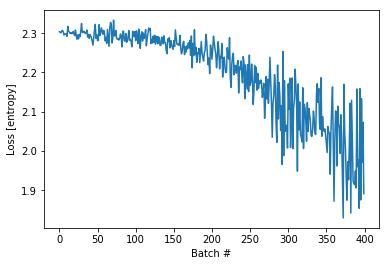

In [29]:
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

In [30]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.W = tf.Variable(5., name='weight')
        self.B = tf.Variable(10., name='bias')
    def call(self, inputs):
        return inputs * self.W + self.B

In [31]:
# A toy dataset of points around 3 * x + 2
NUM_EXAMPLES = 2000
training_inputs = tf.random_normal([NUM_EXAMPLES])
noise = tf.random_normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

# The loss function to be optimized
def loss(model, inputs, targets):
    error = model(inputs) - targets
    return tf.reduce_mean(tf.square(error))

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, [model.W, model.B])

# Define:
# 1. A model.
# 2. Derivatives of a loss function with respect to model parameters.
# 3. A strategy for updating the variables based on the derivatives.
model = Model()
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

# Training loop
for i in range(300):
    grads = grad(model, training_inputs, training_outputs)
    optimizer.apply_gradients(zip(grads, [model.W, model.B]),
                              global_step=tf.train.get_or_create_global_step())
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))
        
print("Final loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

Initial loss: 70.059
Loss at step 000: 67.314
Loss at step 020: 30.466
Loss at step 040: 14.095
Loss at step 060: 6.823
Loss at step 080: 3.591
Loss at step 100: 2.156
Loss at step 120: 1.518
Loss at step 140: 1.235
Loss at step 160: 1.109
Loss at step 180: 1.053
Loss at step 200: 1.028
Loss at step 220: 1.017
Loss at step 240: 1.012
Loss at step 260: 1.010
Loss at step 280: 1.009
Final loss: 1.008
W = 3.017101287841797, B = 1.966610074043274


In [32]:
if tf.test.is_gpu_available():
    with tf.device("gpu:0"):
        v = tf.Variable(tf.random_normal([1000, 1000]))
        v = None # v no longer takes up GPU memory

In [33]:
x = tf.Variable(10.)
checkpoint = tf.train.Checkpoint(x=x)

In [34]:
x.assign(2.) # Assign a new value to the variables and save.
checkpoint_path = './ckpt/'
checkpoint.save(checkpoint_path)

'./ckpt/-1'

In [35]:
x.assign(11.) # Change the variable after saving.
# Restore values from the checkpoint
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_path))
print(x) # => 2.0

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


In [36]:
import os
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
checkpoint_dir = './model_dir'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
root = tf.train.Checkpoint(optimizer=optimizer,
                           model=model,
                           optimizer_step=tf.train.get_or_create_global_step())
root.save(checkpoint_prefix)
root.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [37]:
m = tfe.metrics.Mean("loss")
m(0)
m(5)
m.result() # => 2.5
m([8, 9])
m.result() # => 5.5

<tf.Tensor: id=62650, shape=(), dtype=float64, numpy=5.5>

In [38]:
global_step = tf.train.get_or_create_global_step()
logdir = "./tb/"
writer = tf.contrib.summary.create_file_writer(logdir)
writer.set_as_default()
for _ in range(10):
    global_step.assign_add(1)
    # Must include a record_summaries method
    with tf.contrib.summary.record_summaries_every_n_global_steps(100):
        # your model code goes here
        tf.contrib.summary.scalar('global_step', global_step)

In [39]:
def line_search_step(fn, init_x, rate=1.0):
    with tf.GradientTape() as tape:
        # Variables are automatically recorded, but manually watch a tensor
        tape.watch(init_x)
        value = fn(init_x)
    grad = tape.gradient(value, init_x)
    grad_norm = tf.reduce_sum(grad * grad)
    init_value = value
    while value > init_value - rate * grad_norm:
        x = init_x - rate * grad
        value = fn(x)
        rate /= 2.0
    return x, value

In [40]:
def square(x):
    return tf.multiply(x, x)

grad = tfe.gradients_function(square)

In [41]:
square(3.).numpy()

9.0

In [42]:
grad(3.)[0].numpy()

6.0

In [43]:
# The second-order derivative of square:
gradgrad = tfe.gradients_function(lambda x: grad(x)[0])
gradgrad(3.)[0].numpy()

2.0

In [44]:
# The third-order derivative is None:
gradgradgrad = tfe.gradients_function(lambda x: gradgrad(x)[0])
gradgradgrad(3.)

[None]

In [45]:
# With flow control:
def abs(x):
    return x if x > 0 else -x
grad = tfe.gradients_function(abs)

In [46]:
grad(3.)[0].numpy()

1.0

In [47]:
grad(-3.)[0].numpy()

-1.0

In [48]:
@tf.custom_gradient
def clip_gradient_by_norm(x, norm):
    y = tf.identity(x)
    def grad_fn(dresult):
        return [tf.clip_by_norm(dresult, norm), None]
    return y, grad_fn

In [49]:
def log1pexp(x):
    return tf.log(1 + tf.exp(x))
grad_log1pexp = tfe.gradients_function(log1pexp)

In [50]:
# The gradient computation works fine at x = 0.
grad_log1pexp(0.)[0].numpy()

0.5

In [51]:
# However, x = 100 fails because of numerical instability.
grad_log1pexp(100.)[0].numpy()

nan

In [52]:
@tf.custom_gradient
def log1pexp(x):
    e = tf.exp(x)
    def grad(dy):
        return dy * (1 - 1 / (1 + e))
    return tf.log(1 + e), grad
grad_log1pexp = tfe.gradients_function(log1pexp)

In [53]:
# As before, the gradient computation works fine at x = 0.
grad_log1pexp(0.)[0].numpy()

0.5

In [54]:
# And the gradient computation also works at x = 100.
grad_log1pexp(100.)[0].numpy()

1.0

In [55]:
import time
def measure(x, steps):
    # TensorFlow initializes a GPU the first time it's used, exclude from timing.
    tf.matmul(x, x)
    start = time.time()
    for i in range(steps):
        x = tf.matmul(x, x)
    # tf.matmul can return before completing the matrix multiplication
    # (e.g., can return after enqueing the operation on a CUDA stream).
    # The x.numpy() call below will ensure that all enqueued operations
    # have completed (and will also copy the result to host memory,
    # so we're including a little more than just the matmul operation
    # time).
    _ = x.numpy()
    end = time.time()
    return end - start

shape = (1000, 1000)
steps = 200
print("Time to multiply a {} matrix by itself {} times:".format(shape, steps))

# Run on CPU:
with tf.device("/cpu:0"):
    print("CPU: {} secs".format(measure(tf.random_normal(shape), steps)))
    
# Run on GPU, if available:
if tfe.num_gpus() > 0:
    with tf.device("/gpu:0"):
        print("GPU: {} secs".format(measure(tf.random_normal(shape), steps)))
else:
    print("GPU: not found")

Time to multiply a (1000, 1000) matrix by itself 200 times:
CPU: 5.393440246582031 secs
GPU: not found


In [56]:
if tf.test.is_gpu_available():
    x = tf.random_normal([10, 10])
    
    x_gpu0 = x.gpu()
    x_cpu = x.cpu()
    
    _ = tf.matmul(x_cpu, x_cpu) # Runs on CPU
    _ = tf.matmul(x_gpu0, x_gpu0) # Runs on GPU:0
    
    if tfe.num_gpus() > 1:
        x_gpu1 = x.gpu(1)
        _ = tf.matmul(x_gpu1, x_gpu1) # Runs on GPU:1

In [57]:
def my_py_func(x):
    x = tf.matmul(x, x) # You can use tf ops
    print(x) # but it's eager!
    return x

with tf.Session() as sess:
    x = tf.placeholder(dtype=tf.float32)
    # Call eager function in graph!
    pf = tfe.py_func(my_py_func, [x], tf.float32)
    
    sess.run(pf, feed_dict={x: [[2.0]]}) # [[4.0]]

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)
